### Sommaire

* [Préparation](#chapter1)

    * [Initialisation](#section_1_1)
    * [Analyse et Adaptation des données](#section_1_2)    
        *[Exploration des produits](#section_1_2_1)        
        *[Exploration du fichier Clients](#section_1_2_2)   
        *[Exploration du fichier transactions](#section_1_2_3)
    * [Mise en place de la base de données globale](#section_1_3)  
        
* [Analyse Des données](#chapter2)
    * [Etude Des Chiffres d'affaires](#Section_2_1)
    * [Analyse Univariée de l'âge](#Section_2_2)
    * [étude des paniers](#Section_2_3)
    * [Repartition des ventes par catégorie de livres](#Section_2_4)
    * [Analyse des tops et des flops par livre](#Section_2_5)
    * [Analyse du Chiffres d'affaires par catégories](#Section_2_6)
    * [Analyse du CA par Client + Courbes](#Section_2_7)
    * [Recherche de corrélations Statistiques](#Section_2_8)
    * [Recherche de corrélation entre l'age et le chiffre d'affaire](#Section_2_9)
    *[Fréquence D'achats](#Section_2_FA)
    * [Correlation entre l'age et la taille du panier moyen](#Section_2_10)
    * [Categorie de livre achetés par age](#Section_2_11)

### Préparation <a class="anchor" id="chapter1"></a>

### Initialisation <a class="anchor" id="section_1_1"></a>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
from datetime import date 
warnings.filterwarnings('ignore')

from scipy.stats import ttest_1samp
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import pearsonr
from scipy.stats import shapiro

In [2]:
customers = pd.read_csv ("customers.csv")
customers

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


In [3]:
products = pd.read_csv ("products.csv")
products

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [4]:
transactions = pd.read_csv("transactions.csv")
transactions

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


## Analyse et Adaptation des données <a class="anchor" id="section_1_2"></a>

### Exploration des produits <a class="anchor" id="section_1_2_1"></a>

In [5]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [6]:
products.describe()

,price,categ
count,3287.000000,3287.000000
mean,21.856641,0.370246
std,29.847908,0.615387
min,-1.000000,0.000000
25%,6.990000,0.000000
50%,13.060000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


In [7]:
products[products["price"]<=0]

,id_prod,price,categ
731,T_0,-1.0,0


On constate une valeur étrange, on manque de contexte afin d'en savoir plus, on va donc la garder de coté jusqu'à ce que l'on ait analysé les autres fichiers

### Exploration du fichier Clients <a class="anchor" id="section_1_2_2"></a>


In [8]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [9]:
customers.describe(include="all")

,client_id,sex,birth
count,8623,8623,8623.000000
unique,8623,2,NaN
top,c_4410,f,NaN
freq,1,4491,NaN
mean,NaN,NaN,1978.280877
std,NaN,NaN,16.919535
min,NaN,NaN,1929.000000
25%,NaN,NaN,1966.000000
50%,NaN,NaN,1979.000000
75%,NaN,NaN,1992.000000


In [10]:
todays_date = date.today()
todays_date

datetime.date(2023, 2, 19)

In [11]:
todays_year = todays_date.year
todays_year

2023

In [12]:
customers["age"] = todays_year - customers["birth"]
customers

,client_id,sex,birth,age
0,c_4410,f,1967,56
1,c_7839,f,1975,48
2,c_1699,f,1984,39
3,c_5961,f,1962,61
4,c_5320,m,1943,80
...,...,...,...,...
8618,c_7920,m,1956,67
8619,c_7403,f,1970,53
8620,c_5119,m,1974,49
8621,c_5643,f,1968,55


### Exploration du fichier transactions <a class="anchor" id="section_1_2_3"></a>

In [13]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


In [14]:
transactions

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


pd.to_datetime(transactions["date"])

execute une Erreur : ParserError: Unknown string format: test_2021-03-01 02:30:02.237419

In [15]:
transactions[transactions["date"].str.contains('test_', regex=False)]

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [16]:
transactions = transactions[~transactions["date"].str.contains('test_', regex=False)]
transactions

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


In [17]:
transactions["date"] = pd.to_datetime(transactions["date"])

In [18]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 25.9+ MB


## Mise en place de la base de données globale <a class="anchor" id="section_1_3"></a>

In [19]:
transactions.nunique()

id_prod         3266
date          679332
session_id    342315
client_id       8600
dtype: int64

In [20]:
customers.nunique()

client_id    8623
sex             2
birth          76
age            76
dtype: int64

In [21]:
products.nunique()

id_prod    3287
price      1455
categ         3
dtype: int64

On peut remarquer qu'il y a des produits qui n'ont jamais été vendus et des clients qui n'ont jamais rien achetés

In [22]:
transactions

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


In [23]:
products


,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [24]:
df_global =  transactions.merge(products,on='id_prod',indicator = True,how = 'outer')
df_global

,id_prod,date,session_id,client_id,price,categ,_merge
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,both
1,0_1518,2021-09-26 12:37:29.780414,s_95811,c_6197,4.18,0.0,both
2,0_1518,2021-05-06 17:14:43.117440,s_30782,c_682,4.18,0.0,both
3,0_1518,2022-03-16 18:57:10.420103,s_180057,c_5932,4.18,0.0,both
4,0_1518,2022-11-12 18:58:10.574853,s_296584,c_7217,4.18,0.0,both
...,...,...,...,...,...,...,...
679349,0_1624,NaT,NaN,NaN,24.50,0.0,right_only
679350,2_86,NaT,NaN,NaN,132.36,2.0,right_only
679351,0_299,NaT,NaN,NaN,22.99,0.0,right_only
679352,0_510,NaT,NaN,NaN,23.66,0.0,right_only


In [25]:
df_global[df_global["_merge"]!="both"]

,id_prod,date,session_id,client_id,price,categ,_merge
542560,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746,NaN,NaN,left_only
542561,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713,NaN,NaN,left_only
542562,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108,NaN,NaN,left_only
542563,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391,NaN,NaN,left_only
542564,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954,NaN,NaN,left_only
...,...,...,...,...,...,...,...
679349,0_1624,NaT,NaN,NaN,24.50,0.0,right_only
679350,2_86,NaT,NaN,NaN,132.36,2.0,right_only
679351,0_299,NaT,NaN,NaN,22.99,0.0,right_only
679352,0_510,NaT,NaN,NaN,23.66,0.0,right_only


In [26]:
df_global[df_global["_merge"]=="left_only"].nunique()

id_prod         1
date          221
session_id    221
client_id     100
price           0
categ           0
_merge          1
dtype: int64

On constate qu'il n'y a qu'un seul produit qui n'est pas renseigné: 
On dispose de 2 options :
soit on le supprime 
soit on essaye de retrouver ou estimer son prix 

In [27]:
df_global = df_global[df_global["_merge"]=="both"]
df_global

,id_prod,date,session_id,client_id,price,categ,_merge
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,both
1,0_1518,2021-09-26 12:37:29.780414,s_95811,c_6197,4.18,0.0,both
2,0_1518,2021-05-06 17:14:43.117440,s_30782,c_682,4.18,0.0,both
3,0_1518,2022-03-16 18:57:10.420103,s_180057,c_5932,4.18,0.0,both
4,0_1518,2022-11-12 18:58:10.574853,s_296584,c_7217,4.18,0.0,both
...,...,...,...,...,...,...,...
679327,0_1279,2021-06-23 06:50:48.888907,s_52563,c_1025,20.99,0.0,both
679328,0_1683,2021-12-24 04:37:46.407713,s_139091,c_5508,2.99,0.0,both
679329,0_1379,2021-10-16 09:19:09.546713,s_105547,c_5425,2.99,0.0,both
679330,0_886,2021-03-17 03:34:14.461358,s_7410,c_7219,21.82,0.0,both


In [28]:
df_global.drop(["_merge"], axis=1, inplace=True)
df_global

,id_prod,date,session_id,client_id,price,categ
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0
1,0_1518,2021-09-26 12:37:29.780414,s_95811,c_6197,4.18,0.0
2,0_1518,2021-05-06 17:14:43.117440,s_30782,c_682,4.18,0.0
3,0_1518,2022-03-16 18:57:10.420103,s_180057,c_5932,4.18,0.0
4,0_1518,2022-11-12 18:58:10.574853,s_296584,c_7217,4.18,0.0
...,...,...,...,...,...,...
679327,0_1279,2021-06-23 06:50:48.888907,s_52563,c_1025,20.99,0.0
679328,0_1683,2021-12-24 04:37:46.407713,s_139091,c_5508,2.99,0.0
679329,0_1379,2021-10-16 09:19:09.546713,s_105547,c_5425,2.99,0.0
679330,0_886,2021-03-17 03:34:14.461358,s_7410,c_7219,21.82,0.0


In [29]:
df_global =  df_global.merge(customers,on='client_id',indicator = True,how = 'outer')
df_global

,id_prod,date,session_id,client_id,price,categ,sex,birth,age,_merge
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,f,1986,37,both
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,4.18,0.0,f,1986,37,both
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,4.18,0.0,f,1986,37,both
3,0_1418,2022-06-18 01:49:37.823274,s_225411,c_103,8.57,0.0,f,1986,37,both
4,0_1418,2021-08-18 01:49:37.823274,s_77214,c_103,8.57,0.0,f,1986,37,both
...,...,...,...,...,...,...,...,...,...,...
679129,NaN,NaT,NaN,c_7584,NaN,NaN,f,1960,63,right_only
679130,NaN,NaT,NaN,c_90,NaN,NaN,m,2001,22,right_only
679131,NaN,NaT,NaN,c_587,NaN,NaN,m,1993,30,right_only
679132,NaN,NaT,NaN,ct_1,NaN,NaN,m,2001,22,right_only


In [30]:
df_global[df_global["_merge"]=="left_only"]

,id_prod,date,session_id,client_id,price,categ,sex,birth,age,_merge


In [31]:
df_global[df_global["_merge"]=="right_only"]

,id_prod,date,session_id,client_id,price,categ,sex,birth,age,_merge
679111,NaN,NaT,NaN,c_8253,NaN,NaN,f,2001,22,right_only
679112,NaN,NaT,NaN,c_3789,NaN,NaN,f,1997,26,right_only
679113,NaN,NaT,NaN,c_4406,NaN,NaN,f,1998,25,right_only
679114,NaN,NaT,NaN,ct_0,NaN,NaN,f,2001,22,right_only
679115,NaN,NaT,NaN,c_2706,NaN,NaN,f,1967,56,right_only
679116,NaN,NaT,NaN,c_3443,NaN,NaN,m,1959,64,right_only
679117,NaN,NaT,NaN,c_4447,NaN,NaN,m,1956,67,right_only
679118,NaN,NaT,NaN,c_3017,NaN,NaN,f,1992,31,right_only
679119,NaN,NaT,NaN,c_4086,NaN,NaN,f,1992,31,right_only
679120,NaN,NaT,NaN,c_6930,NaN,NaN,m,2004,19,right_only


Cela correspond aux clients qui n'ont rien achetés, on va les retirer de notre BDD

In [32]:
df_global = df_global[df_global["_merge"]=="both"]

In [33]:
df_global.drop(["_merge"], axis=1 , inplace = True)
df_global

,id_prod,date,session_id,client_id,price,categ,sex,birth,age
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,f,1986,37
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,4.18,0.0,f,1986,37
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,4.18,0.0,f,1986,37
3,0_1418,2022-06-18 01:49:37.823274,s_225411,c_103,8.57,0.0,f,1986,37
4,0_1418,2021-08-18 01:49:37.823274,s_77214,c_103,8.57,0.0,f,1986,37
...,...,...,...,...,...,...,...,...,...
679106,2_147,2021-07-23 07:01:38.963669,s_65994,c_4391,181.99,2.0,f,2001,22
679107,0_142,2022-03-25 18:07:25.880052,s_184472,c_1232,19.85,0.0,f,1960,63
679108,0_142,2021-09-25 18:07:25.880052,s_95415,c_1232,19.85,0.0,f,1960,63
679109,2_205,2021-03-11 00:11:32.016264,s_4605,c_7534,100.99,2.0,m,1992,31


## Analyse Des données <a class="anchor" id="chapter2"></a>

### Etude Des Chiffres d'affaires <a class="anchor" id="Section_2_1"></a>

In [34]:
df_global.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679111 entries, 0 to 679110
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679111 non-null  object        
 1   date        679111 non-null  datetime64[ns]
 2   session_id  679111 non-null  object        
 3   client_id   679111 non-null  object        
 4   price       679111 non-null  float64       
 5   categ       679111 non-null  float64       
 6   sex         679111 non-null  object        
 7   birth       679111 non-null  int64         
 8   age         679111 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 51.8+ MB


In [35]:
df_DateIndex = df_global.set_index("date")
df_DateIndex = df_DateIndex[["price","categ"]]
df_DateIndex

,price,categ
date,,
2022-05-20 13:21:29.043970,4.18,0.0
2021-07-20 13:21:29.043970,4.18,0.0
2022-08-20 13:21:29.043970,4.18,0.0
2022-06-18 01:49:37.823274,8.57,0.0
2021-08-18 01:49:37.823274,8.57,0.0
...,...,...
2021-07-23 07:01:38.963669,181.99,2.0
2022-03-25 18:07:25.880052,19.85,0.0
2021-09-25 18:07:25.880052,19.85,0.0


On a au dessus un tableau avec toutes les ventes 

On a ici un tableau avec les CA quotidiens 

In [36]:
df_DateIndex[["price","categ"]].resample("d")["price"].sum()

date
2021-03-01    16565.22
2021-03-02    15486.45
2021-03-03    15198.69
2021-03-04    15196.07
2021-03-05    17471.37
                ...   
2023-02-24    15207.89
2023-02-25    15761.25
2023-02-26    16304.72
2023-02-27    19170.81
2023-02-28    18105.15
Freq: D, Name: price, Length: 730, dtype: float64

<AxesSubplot:xlabel='date'>

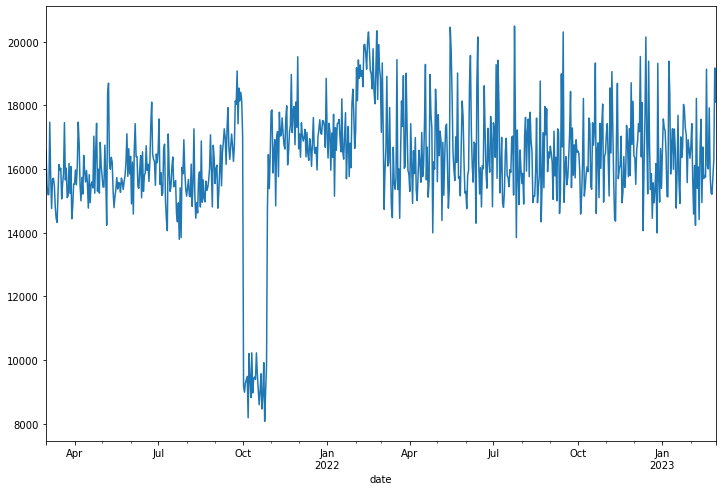

In [37]:
df_DateIndex["price"].resample("d").sum().plot(figsize=(12, 8))

<AxesSubplot:xlabel='date'>

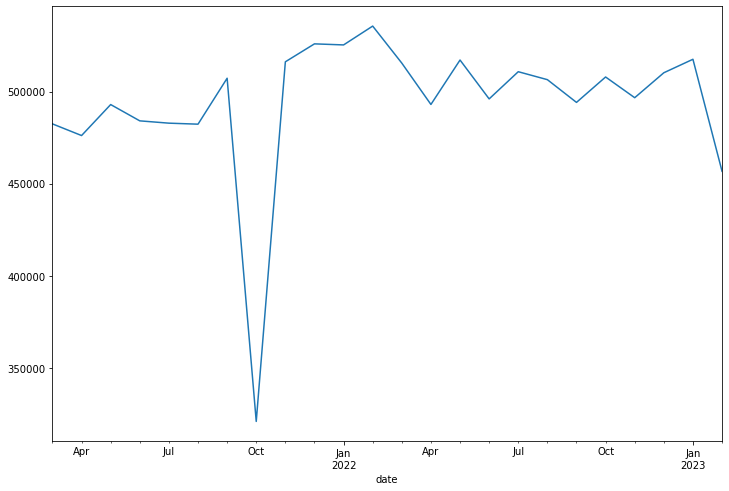

In [38]:
df_DateIndex["price"].resample("m").sum().plot(figsize=(12, 8))

On a ici la répartition des ventes dans le temps , On remarque un pic bas aux alentours d'octobre

On va maintenant faire une analyse plus poussé par categorie


In [39]:
df_DateIndex[df_DateIndex['categ']== 0.0]

,price,categ
date,,
2022-05-20 13:21:29.043970,4.18,0.0
2021-07-20 13:21:29.043970,4.18,0.0
2022-08-20 13:21:29.043970,4.18,0.0
2022-06-18 01:49:37.823274,8.57,0.0
2021-08-18 01:49:37.823274,8.57,0.0
...,...,...
2022-12-13 23:00:11.780612,9.57,0.0
2021-11-13 23:00:11.780612,9.57,0.0
2021-09-15 19:42:08.596375,13.36,0.0


In [40]:
df_octobre = df_DateIndex.loc['2021-10']
df_octobre

,price,categ
date,,
2021-10-28 07:35:26.214204,16.87,0.0
2021-10-23 12:41:03.390366,16.97,0.0
2021-10-28 07:16:09.667580,9.71,0.0
2021-10-06 18:34:39.902464,7.99,0.0
2021-10-19 22:45:29.086913,15.99,0.0
...,...,...
2021-10-31 02:28:39.926181,49.61,2.0
2021-10-09 09:03:48.268536,8.99,0.0
2021-10-19 10:30:12.732366,6.59,0.0


on a ici le mois d'octobre 


In [41]:
df_octobre_C0 = df_octobre[df_octobre["categ"] == 0.0]
df_octobre_C1 = df_octobre[df_octobre["categ"] == 1.0]
df_octobre_C2 = df_octobre[df_octobre["categ"] == 2.0]

<AxesSubplot:xlabel='date'>

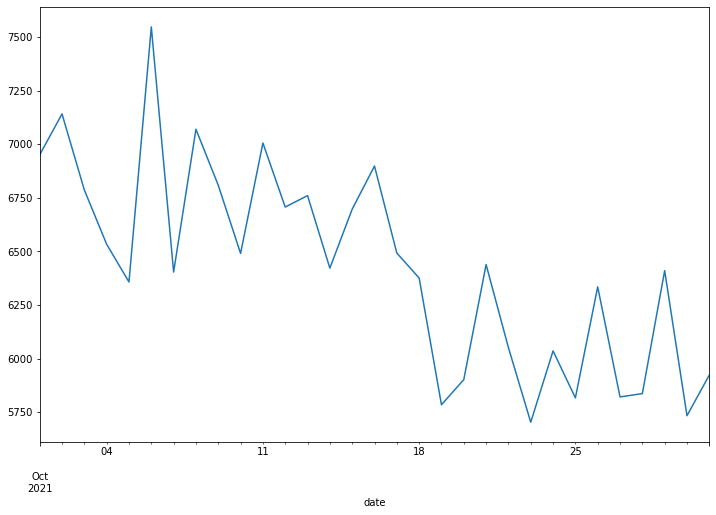

In [42]:
df_octobre_C0["price"].resample("d").sum().plot(figsize=(12, 8))

<AxesSubplot:xlabel='date'>

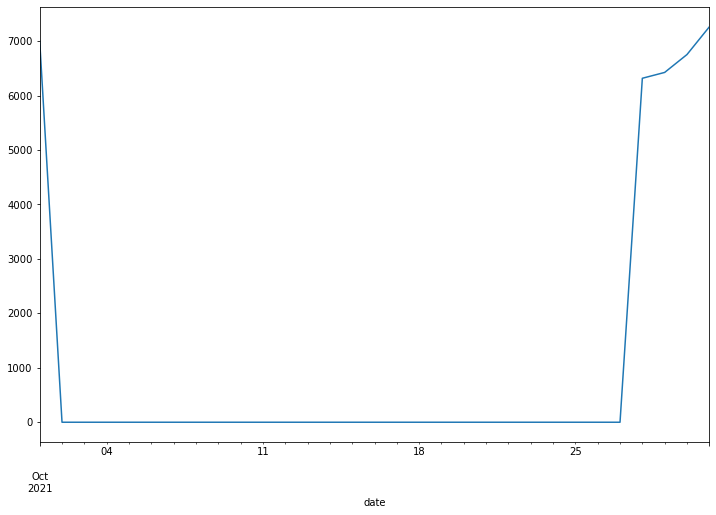

In [43]:
df_octobre_C1["price"].resample("d").sum().plot(figsize=(12, 8))

<AxesSubplot:xlabel='date'>

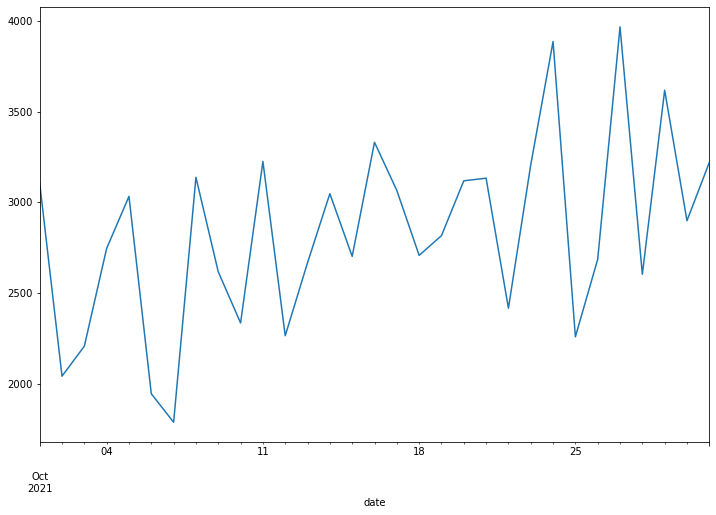

In [44]:
df_octobre_C2["price"].resample("d").sum().plot(figsize=(12, 8))

On constate qu'il n'y a pas de vente dans la categorie C1, il s'agit soit d'un manque de données, ou alors par exemple il y a eu des travaux sur le rayon pendant le mois .... etc 

plt.stackplot(df_octobre.index,df_octobre[df_octobre["categ"] == 0.0],df_octobre[df_octobre["categ"] == 1.0],df_octobre[df_octobre["categ"] == 2.0], labels=['A','B','C'])

In [45]:
df_DateIndex["price"].resample("d").sum()

date
2021-03-01    16565.22
2021-03-02    15486.45
2021-03-03    15198.69
2021-03-04    15196.07
2021-03-05    17471.37
                ...   
2023-02-24    15207.89
2023-02-25    15761.25
2023-02-26    16304.72
2023-02-27    19170.81
2023-02-28    18105.15
Freq: D, Name: price, Length: 730, dtype: float64

## Analyse Univariée de l'âge  <a class="anchor" id="Section_2_2"></a>


In [46]:
df_global_grouped = df_global.groupby(by="client_id").max()
df_global_grouped["age"]

client_id
c_1       68
c_10      67
c_100     31
c_1000    57
c_1001    41
          ..
c_995     68
c_996     53
c_997     29
c_998     22
c_999     59
Name: age, Length: 8600, dtype: int64

On va dessiner un histogramme pour visualiser l'age de nos clients

<AxesSubplot:>

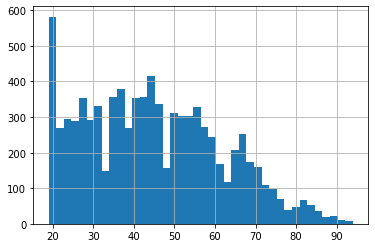

In [47]:
df_global_grouped['age'].hist(bins = 40)

bins sert a controler l'intervalle des batons de l'histogramme 

La valeur élevé au niveau des 20 ans peut correspondre aux personnes mineures si le site propose un age  a partir de 18 ans 

In [48]:
df_global_grouped["sex"].value_counts()

f    4479
m    4121
Name: sex, dtype: int64

<AxesSubplot:>

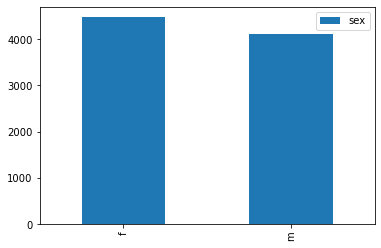

In [49]:
pd.DataFrame(df_global_grouped["sex"].value_counts()).plot.bar()

## étude des paniers <a class="anchor" id="Section_2_3"></a>


On va etudier les paniers avec un group by session

Avec un sum afin de connaitre le montant du panier 

In [50]:
panier_global = df_global.groupby(by="session_id").sum()
panier_global

,price,categ,birth,age
session_id,,,,
s_1,11.99,0.0,1967,56
s_10,26.99,1.0,1970,53
s_100,33.72,0.0,3956,90
s_1000,39.22,0.0,7956,136
s_10000,41.49,1.0,5967,102
...,...,...,...,...
s_99994,28.92,0.0,5949,120
s_99995,19.84,0.0,1960,63
s_99996,56.27,0.0,7896,196


<AxesSubplot:ylabel='Frequency'>

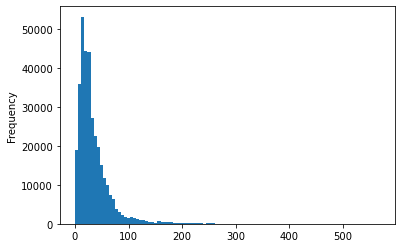

In [51]:
panier_global["price"].plot.hist(bins = 100)

On remarque que la majorité des paniers tourne aux alentours de 20euros

## Repartition des ventes par catégorie de livres <a class="anchor" id="Section_2_4"></a>

In [52]:
df_global["categ"].value_counts()

0.0    415459
1.0    227169
2.0     36483
Name: categ, dtype: int64

il y a 3 catégories de livres qui se sont vendus 

<AxesSubplot:>

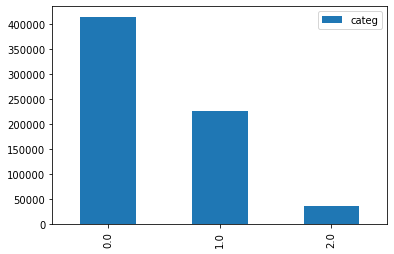

In [53]:
pd.DataFrame(df_global["categ"].value_counts()).plot.bar()

On remarque que les livres de catégorie 0 sont ceux qui se vendent le plus


## Analyse des tops et des flops par livre <a class="anchor" id="Section_2_5"></a>

On va grouper les livres en fct des ventes 


In [54]:
df_global


,id_prod,date,session_id,client_id,price,categ,sex,birth,age
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,f,1986,37
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,4.18,0.0,f,1986,37
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,4.18,0.0,f,1986,37
3,0_1418,2022-06-18 01:49:37.823274,s_225411,c_103,8.57,0.0,f,1986,37
4,0_1418,2021-08-18 01:49:37.823274,s_77214,c_103,8.57,0.0,f,1986,37
...,...,...,...,...,...,...,...,...,...
679106,2_147,2021-07-23 07:01:38.963669,s_65994,c_4391,181.99,2.0,f,2001,22
679107,0_142,2022-03-25 18:07:25.880052,s_184472,c_1232,19.85,0.0,f,1960,63
679108,0_142,2021-09-25 18:07:25.880052,s_95415,c_1232,19.85,0.0,f,1960,63
679109,2_205,2021-03-11 00:11:32.016264,s_4605,c_7534,100.99,2.0,m,1992,31


In [55]:
Sum_Per_Prod = pd.DataFrame(df_global.groupby(by="id_prod")["price"].sum())
Sum_Per_Prod

,price
id_prod,
0_0,4657.50
0_1,5352.13
0_10,394.90
0_100,61.80
0_1000,2954.88
...,...
2_95,395.96
2_96,28650.18
2_97,2092.87


In [56]:
Sum_Per_Prod.sort_values("price", ascending = False).head(10)

,price
id_prod,
2_159,94893.50
2_135,69334.95
2_112,65407.76
2_102,60736.78
2_209,56971.86
1_395,54356.25
1_369,54025.48
2_110,53846.25
2_39,53060.85


On a ici les 10 meilleures ventes

In [57]:
Sum_Per_Prod.sort_values("price", ascending = True).head(10)

,price
id_prod,
0_1539,0.99
0_1284,1.38
0_1653,1.98
0_1601,1.99
0_807,1.99
0_541,1.99
0_1728,2.27
0_1498,2.48
0_898,2.54


Ici les 10 moins vendues

Commentaire, faire l'analyse en fct des dates de ventes des livres 

## Analyse du Chiffres d'affaires par catégories <a class="anchor" id="Section_2_6"></a>

On veut maintenant le CA par Catégorie

In [58]:
df_global

,id_prod,date,session_id,client_id,price,categ,sex,birth,age
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,f,1986,37
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,4.18,0.0,f,1986,37
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,4.18,0.0,f,1986,37
3,0_1418,2022-06-18 01:49:37.823274,s_225411,c_103,8.57,0.0,f,1986,37
4,0_1418,2021-08-18 01:49:37.823274,s_77214,c_103,8.57,0.0,f,1986,37
...,...,...,...,...,...,...,...,...,...
679106,2_147,2021-07-23 07:01:38.963669,s_65994,c_4391,181.99,2.0,f,2001,22
679107,0_142,2022-03-25 18:07:25.880052,s_184472,c_1232,19.85,0.0,f,1960,63
679108,0_142,2021-09-25 18:07:25.880052,s_95415,c_1232,19.85,0.0,f,1960,63
679109,2_205,2021-03-11 00:11:32.016264,s_4605,c_7534,100.99,2.0,m,1992,31


In [59]:
 Total_Categ =pd.DataFrame(df_global.groupby(by="categ")["price"].sum()).sort_values(by="price",ascending=False)
Total_Categ

,price
categ,
1.0,4653722.69
0.0,4419730.97
2.0,2780275.02


<AxesSubplot:xlabel='categ'>

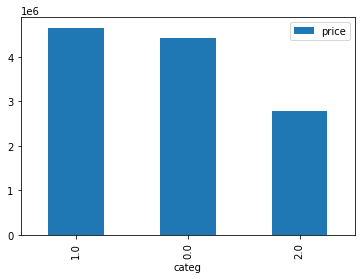

In [60]:
 Total_Categ.plot.bar()

In [61]:
Mean_Price_Categ = pd.DataFrame(df_global.groupby(by="categ")["price"].mean()).sort_values(by="price",ascending=False)
Mean_Price_Categ

,price
categ,
2.0,76.207412
1.0,20.485730
0.0,10.638188


<AxesSubplot:xlabel='categ'>

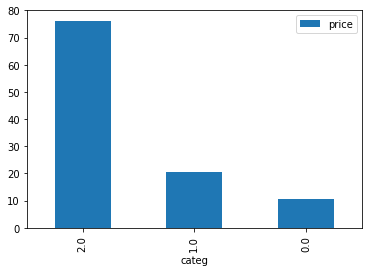

In [62]:
Mean_Price_Categ.plot.bar()

In [63]:
CA_per_Client = pd.DataFrame(df_global.groupby(by="client_id")["price"].sum()).sort_values(by='price',ascending = False)
CA_per_Client.head(10)

,price
client_id,
c_1609,324033.35
c_4958,289760.34
c_6714,153598.92
c_3454,113637.93
c_3263,5276.87
c_1570,5271.62
c_2899,5214.05
c_2140,5208.82
c_7319,5155.77


On remarque 4 gros clients qui doivent etre des entreprises 

X_lorenz = df_global.groupby(by="client_id")["price"].sum().cumsum() / df_global.groupby(by="client_id")["price"].sum().sum()
X_lorenz = np.insert(X_lorenz, 0, 0)
X_lorenz[0], X_lorenz[-1]

faire courbe de lorrenz 


In [64]:
df_global.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679111 entries, 0 to 679110
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679111 non-null  object        
 1   date        679111 non-null  datetime64[ns]
 2   session_id  679111 non-null  object        
 3   client_id   679111 non-null  object        
 4   price       679111 non-null  float64       
 5   categ       679111 non-null  float64       
 6   sex         679111 non-null  object        
 7   birth       679111 non-null  int64         
 8   age         679111 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 51.8+ MB


## Analyse du CA par Client + Courbes  <a class="anchor" id="Section_2_7"></a>

In [65]:
CA_per_Client = CA_per_Client.sort_values(by='price',ascending = True)

In [66]:
Lorrenz_Ca_Client = CA_per_Client.cumsum() / CA_per_Client.sum()
Lorrenz_Ca_Client

,price
client_id,
c_8351,5.323220e-07
c_8140,1.232524e-06
c_8114,2.074453e-06
c_240,3.007492e-06
c_4648,3.952343e-06
...,...
c_3263,9.256748e-01
c_3454,9.352615e-01
c_6714,9.482194e-01


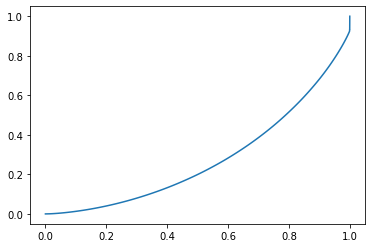

In [67]:
np.sort(Lorrenz_Ca_Client, axis = None)

n = len(Lorrenz_Ca_Client)
Lorrenz_Ca_Client = np.append([0],Lorrenz_Ca_Client) # La courbe de Lorenz commence à 0

xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,Lorrenz_Ca_Client,drawstyle='steps-post')
plt.show()

In [68]:
AUC = (Lorrenz_Ca_Client.sum() -Lorrenz_Ca_Client[-1]/2 -Lorrenz_Ca_Client[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
gini

0.44638654137401457

On a ici l'indice de Gini a env 0.44 

On va donc faire une analyse en excluant les grosses entreprises et en ne conservant que les particuliers

In [69]:
CA_Particuliers = CA_per_Client[CA_per_Client["price"] < 10000]
CA_Particuliers

,price
client_id,
c_8351,6.31
c_8140,8.30
c_8114,9.98
c_240,11.06
c_4648,11.20
...,...
c_7319,5155.77
c_2140,5208.82
c_2899,5214.05


In [70]:
Lorrenz_Ca_Particuliers = CA_Particuliers.cumsum() / CA_Particuliers.sum()
Lorrenz_Ca_Particuliers = Lorrenz_Ca_Particuliers.sort_values(by='price',ascending = True)
Lorrenz_Ca_Particuliers

,price
client_id,
c_8351,5.750637e-07
c_8140,1.331487e-06
c_8114,2.241017e-06
c_240,3.248973e-06
c_4648,4.269688e-06
...,...
c_7319,9.980888e-01
c_2140,9.985635e-01
c_2899,9.990387e-01


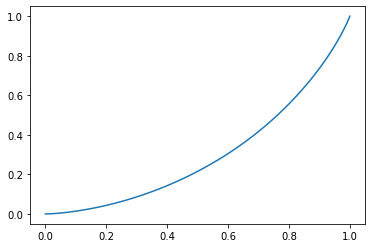

In [71]:
np.sort(Lorrenz_Ca_Particuliers, axis = None)

n = len(Lorrenz_Ca_Particuliers)
Lorrenz_Ca_Particuliers = np.append([0],Lorrenz_Ca_Particuliers) # La courbe de Lorenz commence à 0

xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,Lorrenz_Ca_Particuliers,drawstyle='steps-post')
plt.show()

In [72]:
AUC = (Lorrenz_Ca_Particuliers.sum() -Lorrenz_Ca_Particuliers[-1]/2 -Lorrenz_Ca_Particuliers[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
gini

0.40261686549497755

On remarque ici que l'indice de Gini est inférieur, si on ne prend pas en compte les entreprises, et donc que le facteur d'égalité est meilleur 

Il nous reste les moyennes mobiles pour CA 
Analyse bivariés 

In [73]:
df_global

,id_prod,date,session_id,client_id,price,categ,sex,birth,age
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,f,1986,37
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,4.18,0.0,f,1986,37
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,4.18,0.0,f,1986,37
3,0_1418,2022-06-18 01:49:37.823274,s_225411,c_103,8.57,0.0,f,1986,37
4,0_1418,2021-08-18 01:49:37.823274,s_77214,c_103,8.57,0.0,f,1986,37
...,...,...,...,...,...,...,...,...,...
679106,2_147,2021-07-23 07:01:38.963669,s_65994,c_4391,181.99,2.0,f,2001,22
679107,0_142,2022-03-25 18:07:25.880052,s_184472,c_1232,19.85,0.0,f,1960,63
679108,0_142,2021-09-25 18:07:25.880052,s_95415,c_1232,19.85,0.0,f,1960,63
679109,2_205,2021-03-11 00:11:32.016264,s_4605,c_7534,100.99,2.0,m,1992,31


In [74]:
df_ca_analyse = df_global[["date","price"]]
df_ca_analyse.set_index("date",inplace=True)
df_ca_analyse

,price
date,
2022-05-20 13:21:29.043970,4.18
2021-07-20 13:21:29.043970,4.18
2022-08-20 13:21:29.043970,4.18
2022-06-18 01:49:37.823274,8.57
2021-08-18 01:49:37.823274,8.57
...,...
2021-07-23 07:01:38.963669,181.99
2022-03-25 18:07:25.880052,19.85
2021-09-25 18:07:25.880052,19.85


<AxesSubplot:title={'center':'CA total par année'}, xlabel='date'>

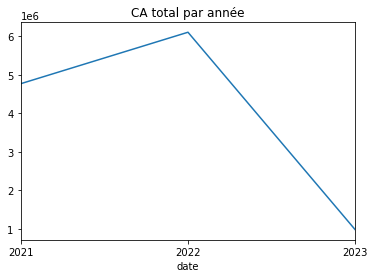

In [75]:
df_ca_analyse["price"].resample("Y").sum().plot(title="CA total par année")


<AxesSubplot:title={'center':'CA total par Mois'}, xlabel='date'>

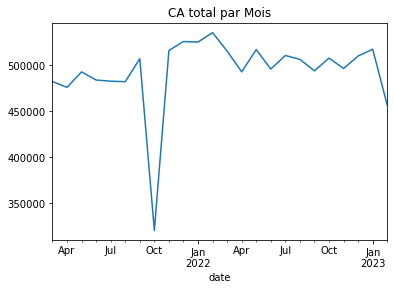

In [76]:
df_ca_analyse["price"].resample("m").sum().plot(title="CA total par Mois")

<AxesSubplot:xlabel='date'>

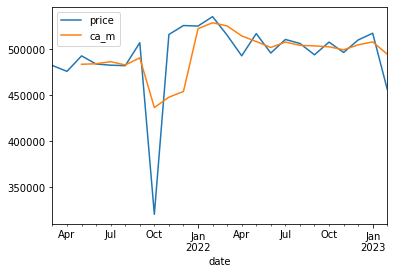

In [77]:
df_transfert = pd.DataFrame(df_ca_analyse["price"].resample("m").sum())
df_transfert['ca_m']= pd.DataFrame(df_transfert["price"].rolling(window=3).mean())
df_transfert.plot()

<AxesSubplot:xlabel='date'>

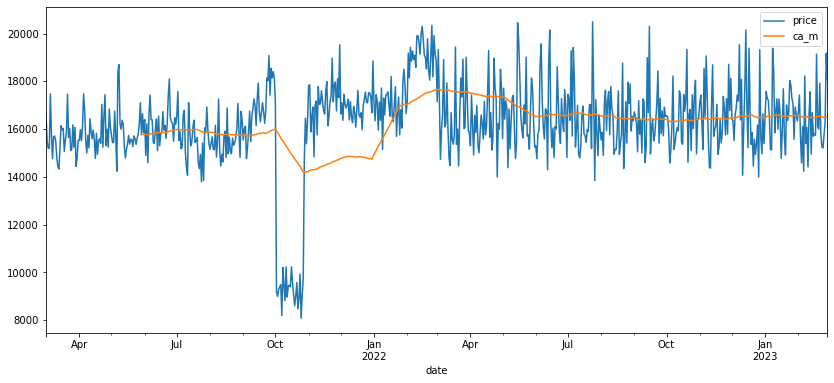

In [78]:
df_transfert = pd.DataFrame(df_ca_analyse["price"].resample("d").sum())
df_transfert['ca_m']= pd.DataFrame(df_transfert["price"].rolling(window=90).mean())
df_transfert.plot(figsize=(14, 6))

<AxesSubplot:xlabel='date'>

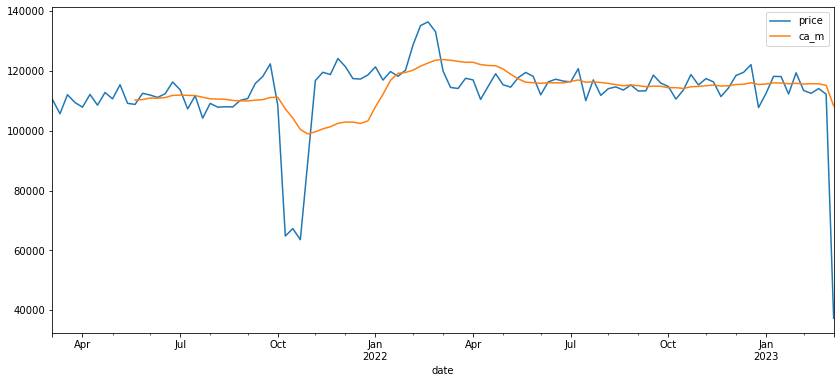

In [79]:
df_transfert = pd.DataFrame(df_ca_analyse["price"].resample("w").sum())
df_transfert['ca_m']= pd.DataFrame(df_transfert["price"].rolling(window=12).mean())
df_transfert.plot(figsize=(14, 6))

On remarque une hausse de la moyenne mobile tri-mensuelle aux alentours de janvier jusqu'en juin, il semblerait que ce soit la periode la plus propice à la vente de livres

In [80]:
df_global


,id_prod,date,session_id,client_id,price,categ,sex,birth,age
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,f,1986,37
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,4.18,0.0,f,1986,37
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,4.18,0.0,f,1986,37
3,0_1418,2022-06-18 01:49:37.823274,s_225411,c_103,8.57,0.0,f,1986,37
4,0_1418,2021-08-18 01:49:37.823274,s_77214,c_103,8.57,0.0,f,1986,37
...,...,...,...,...,...,...,...,...,...
679106,2_147,2021-07-23 07:01:38.963669,s_65994,c_4391,181.99,2.0,f,2001,22
679107,0_142,2022-03-25 18:07:25.880052,s_184472,c_1232,19.85,0.0,f,1960,63
679108,0_142,2021-09-25 18:07:25.880052,s_95415,c_1232,19.85,0.0,f,1960,63
679109,2_205,2021-03-11 00:11:32.016264,s_4605,c_7534,100.99,2.0,m,1992,31


## Recherche de corrélations Statistiques <a class="anchor" id="Section_2_8"></a>

 Correlation entre le genre du client et la catégorie de livres achetés

In [81]:
contingency_table=pd.crosstab(df_global['sex'],df_global['categ'])
print('contingency_table :-\n',contingency_table)

contingency_table :-
 categ     0.0     1.0    2.0
sex                         
f      206103  114899  17283
m      209356  112270  19200


<AxesSubplot:ylabel='categ'>

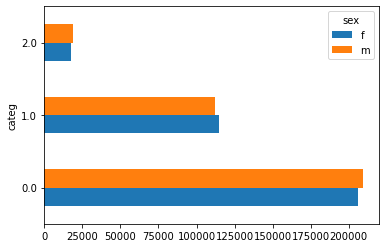

In [82]:
contingency_table.T.plot(kind='barh', ylabel='frequence')


In [83]:
# Chi-square test of independence. 
c, p, dof, expected = chi2_contingency(contingency_table) 
# Print the p-value
print(p)

1.1310980597090762e-32


La p-value possede une valeur très basse donc on rejette H0, La corrélation existe mais n'est pas suffisante pour dire que les catégorie sont spécifique au genre

## Recherche de corrélation entre l'age et le chiffre d'affaire <a class="anchor" id="Section_2_9"></a>

In [84]:
CA_per_Age = pd.DataFrame(df_global[df_global["price"] < 10000].groupby(by="age")["price"].sum()).sort_values(by='price',ascending = False)
CA_per_Age

,price
age,
43,613614.58
19,609013.69
24,489497.54
44,334267.72
35,330760.73
...,...
91,5043.19
88,4793.55
93,4013.87


<AxesSubplot:xlabel='age', ylabel='price'>

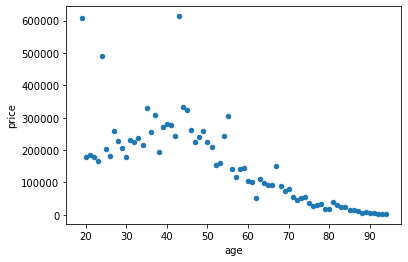

In [85]:
CA_per_Age = CA_per_Age.reset_index()
CA_per_Age.plot.scatter(y = 'price', x ="age" )

H0 : Pas de corrélation entre l'age et le Chiffre d'affaire 
H1 : Il y a une corrélation entre l'age et le chiffre d'affaire

In [86]:
r,p=pearsonr(df_global['price'],df_global['age'])
print(p)
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")
    

0.0
reject null hypothesis


Il y a une correlation puisque le p valeur est inférieure a 0.05

In [87]:
my_rho = np.corrcoef(df_global['price'],df_global['age'])

print(my_rho)

[[ 1.         -0.20946478]
 [-0.20946478  1.        ]]


On a ici un coefficient de correlation négatif

Correlation Age frequence d'achat 

In [88]:
df_global

,id_prod,date,session_id,client_id,price,categ,sex,birth,age
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,f,1986,37
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,4.18,0.0,f,1986,37
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,4.18,0.0,f,1986,37
3,0_1418,2022-06-18 01:49:37.823274,s_225411,c_103,8.57,0.0,f,1986,37
4,0_1418,2021-08-18 01:49:37.823274,s_77214,c_103,8.57,0.0,f,1986,37
...,...,...,...,...,...,...,...,...,...
679106,2_147,2021-07-23 07:01:38.963669,s_65994,c_4391,181.99,2.0,f,2001,22
679107,0_142,2022-03-25 18:07:25.880052,s_184472,c_1232,19.85,0.0,f,1960,63
679108,0_142,2021-09-25 18:07:25.880052,s_95415,c_1232,19.85,0.0,f,1960,63
679109,2_205,2021-03-11 00:11:32.016264,s_4605,c_7534,100.99,2.0,m,1992,31


## Fréquence D'achats <a class="anchor" id="Section_2_FA"></a>

In [89]:
FA_per_Age = pd.DataFrame(df_global)
#FA_per_Age#.reset_index()
#FA_per_Age = pd.DataFrame(df_global.groupby(by="session_id")["price"].sum())
#FA_per_Age.reset_index(inplace = True)
FA_per_Age = pd.DataFrame(df_global.groupby(by="session_id")["age"].mean())
FA_per_Age.reset_index(inplace = True)
FA_per_Age


,session_id,age
0,s_1,56.0
1,s_10,53.0
2,s_100,45.0
3,s_1000,34.0
4,s_10000,34.0
...,...,...
342270,s_99994,40.0
342271,s_99995,63.0
342272,s_99996,49.0
342273,s_99997,44.0


In [90]:
FA_per_Age = pd.DataFrame(FA_per_Age.groupby(by="age")["session_id"].count())
FA_per_Age

,session_id
age,
19.0,8594
20.0,2567
21.0,2604
22.0,2431
23.0,2421
...,...
90.0,233
91.0,206
92.0,96


<AxesSubplot:xlabel='age', ylabel='session_id'>

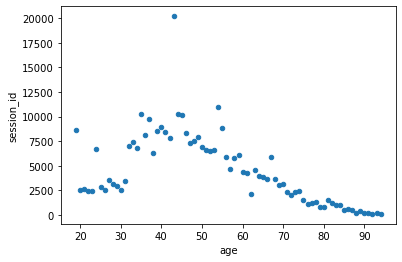

In [91]:
FA_per_Age = FA_per_Age.reset_index()
FA_per_Age.plot.scatter(y = 'session_id', x ="age" )

In [92]:
r,p=pearsonr(FA_per_Age['session_id'],FA_per_Age['age'])
print(p)
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")
    

2.2340386932316515e-07
reject null hypothesis


## Correlation entre l'age et la taille du panier moyen <a class="anchor" id="Section_2_10"></a>

In [93]:
#Panier_per_Age = pd.DataFrame(df_global[df_global["price"] < 10000].groupby(by="session_id")["price"].count()).sort_values(by='price',ascending = False)
#Panier_per_Age

panier_global = pd.DataFrame(df_global[df_global["price"] < 1000].groupby(["age","session_id"])["price"].sum())
panier_global.reset_index(inplace = True)
Panier_moyen_par_age = panier_global.groupby(["age"])["price"].mean()
Panier_moyen_par_age

age
19    70.864986
20    69.417912
21    70.728629
22    73.425627
23    68.156952
        ...    
90    22.550858
91    24.481505
92    29.327604
93    27.492260
94    24.043657
Name: price, Length: 76, dtype: float64

In [94]:
Panier_moyen_par_age = pd.DataFrame(Panier_moyen_par_age)
Panier_moyen_par_age.reset_index(inplace = True)
Panier_moyen_par_age

,age,price
0,19,70.864986
1,20,69.417912
2,21,70.728629
3,22,73.425627
4,23,68.156952
...,...,...
71,90,22.550858
72,91,24.481505
73,92,29.327604
74,93,27.492260


<AxesSubplot:xlabel='age', ylabel='price'>

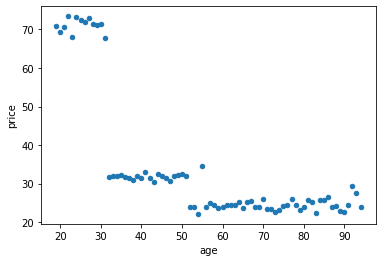

In [95]:
Panier_moyen_par_age.plot.scatter(x='age',y='price')

h0: hypothèse null , pas de corrélation
h1: Il y a une corrélation 

In [96]:
r,p=pearsonr(Panier_moyen_par_age['age'],Panier_moyen_par_age['price'])
print(p)

1.0535124224262495e-14


La p Value est inférieure à 0.05 donc on rejette h0, l'hypothèse null

Il y a donc une corrélation entre l'age et le Panier moyen par age.

## Categorie de livre achetés par age <a class="anchor" id="Section_2_11"></a>


On va effectuer un test de normalité afin de vérifier que les données suivent bien une loi de distribution normale

### Test de Shapiro


<AxesSubplot:ylabel='Frequency'>

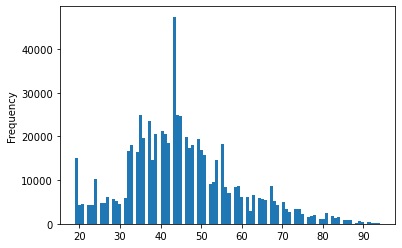

In [97]:
df_global['age'].plot.hist(bins = 100)

On va utiliser le test de Shapiro afin de vérifier la distribution

In [98]:
shapiro(df_global['age'])

ShapiroResult(statistic=0.9742216467857361, pvalue=0.0)

On a une pvalue de 0 donc on rejette h0, la distribution des données ne suit pas une distribution normale

D’après le Théorème Central Limite, même si des données individuelles ne suivent pas une loi normale,
une moyenne issue de ces données suivra, elle, une loi normale,
à condition que l’échantillon collecté soit suffisamment grand.

On considère que l'echantillon est suffisament grand 

### Test Anova

h0: Pas de corrélation

h1: Il y a corrélation

In [99]:
#ANOVA (F-TEST) => Analyse de la variance

grps = pd.unique(df_global.categ.values)
print(grps)
d_data = {grp:df_global['age'][df_global.categ == grp] for grp in grps}
print(d_data) 

[0. 1. 2.]
{0.0: 0         37
1         37
2         37
3         37
4         37
          ..
679081    63
679082    63
679102    53
679107    63
679108    63
Name: age, Length: 415459, dtype: int64, 1.0: 8         37
9         37
10        37
12        37
13        37
          ..
679074    62
679075    62
679099    66
679100    66
679101    19
Name: age, Length: 227169, dtype: int64, 2.0: 779       61
780       61
3834      45
3835      45
4329      52
          ..
679104    20
679105    22
679106    22
679109    31
679110    31
Name: age, Length: 36483, dtype: int64}


In [100]:
F, p = f_oneway(d_data[0.0], d_data[1.0], d_data[2.0])
print("p-value for significance is: ", p)
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value for significance is:  0.0
reject null hypothesis


In [101]:
df_global

,id_prod,date,session_id,client_id,price,categ,sex,birth,age
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,f,1986,37
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,4.18,0.0,f,1986,37
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,4.18,0.0,f,1986,37
3,0_1418,2022-06-18 01:49:37.823274,s_225411,c_103,8.57,0.0,f,1986,37
4,0_1418,2021-08-18 01:49:37.823274,s_77214,c_103,8.57,0.0,f,1986,37
...,...,...,...,...,...,...,...,...,...
679106,2_147,2021-07-23 07:01:38.963669,s_65994,c_4391,181.99,2.0,f,2001,22
679107,0_142,2022-03-25 18:07:25.880052,s_184472,c_1232,19.85,0.0,f,1960,63
679108,0_142,2021-09-25 18:07:25.880052,s_95415,c_1232,19.85,0.0,f,1960,63
679109,2_205,2021-03-11 00:11:32.016264,s_4605,c_7534,100.99,2.0,m,1992,31


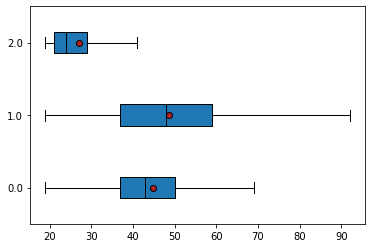

In [102]:
modalites = df_global["categ"].unique()
groupes = []
for m in modalites:
    groupes.append(df_global[df_global["categ"]==m]["age"])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

On peut voir de par le test statistique et de manière visuelle qu' il y a corrélation entre L'age et la catégorie de livre achétés 